<a href="https://colab.research.google.com/github/piyushjain5703/Handwritten-digit-detection/blob/main/handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
from tensorflow import keras
# load data
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(144,activation="relu",kernel_initializer=keras.initializers.HeNormal()),
      keras.layers.Dense(64,activation="relu",kernel_initializer=keras.initializers.HeNormal()),
      keras.layers.Dense(10,activation="softmax")
])

In [6]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = keras.metrics.SparseCategoricalAccuracy()
)

In [7]:
model.fit(x_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.3125 - sparse_categorical_accuracy: 0.9112
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9632
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0865 - sparse_categorical_accuracy: 0.9753
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9804
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0521 - sparse_categorical_accuracy: 0.9848


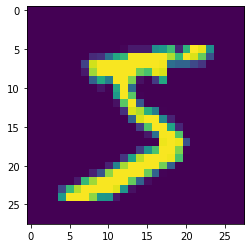

In [15]:
plt.imshow(x_train[0])

In [17]:
y_train[0]

5

In [237]:
x_test[0].shape

(28, 28)

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9773


[0.08023729920387268, 0.9772999882698059]

In [240]:
img  = np.reshape(x_test[9], (1, 28, 28))
img = tf.constant(img,dtype = tf.float32)
np.argmax(model.predict(img))

9

In [242]:
y_test[9]

9

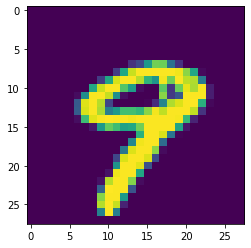

In [243]:
plt.imshow(x_test[9])

In [17]:
def prediction(img):
  img =cv.cvtColor(img,cv.COLOR_RGB2GRAY)
  img = cv.resize(img,(28,28),cv.INTER_LINEAR)
  img = 255-img
  plt.imshow(img)
  img  = np.reshape(img, (1, 28, 28))
  img = img/255
  img = tf.constant(img,dtype = tf.float32)
  predict = model.predict(img)
  return np.argmax(predict)

In [22]:
img = cv.imread("6.jpg")

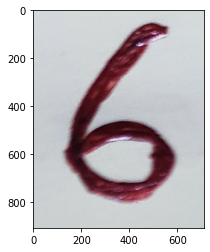

In [23]:
plt.imshow(img)

6


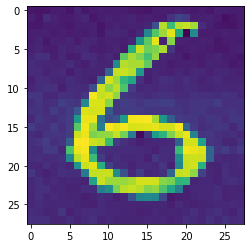

In [24]:
print(prediction(img))